### Evaluating of various Sentiment Analysis methods using Amazon Reviews

#### **Objective**
To perform sentiment analysis on Amazon product reviews using:
1. Naive Bayes with TF-IDF vectorization.
2. A pre-trained RoBERTa model fine-tuned on the dataset.

The project aims to compare the performance of these two approaches and evaluate their trade-offs.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load Dataset
There are lot of categories we can choose from the dataset. Every category has tons of review based on products. We can find the list of categories and their sizes in huggingface(https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/tree/main/raw/review_categories). First I tried using raw_review_Electronics but it takes a lot of time as the file size is more than 22GB and it took me more than 48 minutes to load the dataset to generate 43886944 examples from the dataset. To be time efficient I chose raw_review_Sports_and_Outdoors with more than 9GB filesize that took me 12 minutes to load and generate splits of 19595170 examples . 

In [30]:
from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Amazon_Fashion", trust_remote_code=True)


In [31]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(dataset["full"])
# Split into Train (70%), Temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)




In [32]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,1578528394489,3,True
1,5.0,A,Great,[],B07B4JXK8D,B07B4JXK8D,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1608426246701,0,True
2,2.0,Two Stars,One of the stones fell out within the first 2 ...,[],B007ZSEQ4Q,B007ZSEQ4Q,AHITBJSS7KYUBVZPX7M2WJCOIVKQ,1432344828000,3,True
3,1.0,Won’t buy again,Crappy socks. Money wasted. Bought to wear wit...,[],B07F2BTFS9,B07F2BTFS9,AFVNEEPDEIH5SPUN5BWC6NKL3WNQ,1546289847095,2,True
4,5.0,I LOVE these glasses,I LOVE these glasses! They fit perfectly over...,[],B00PKRFU4O,B00XESJTDE,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1439476166000,0,True


C:\Users\tunzi\AppData\Local\Temp\ipykernel_16916\2683016215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


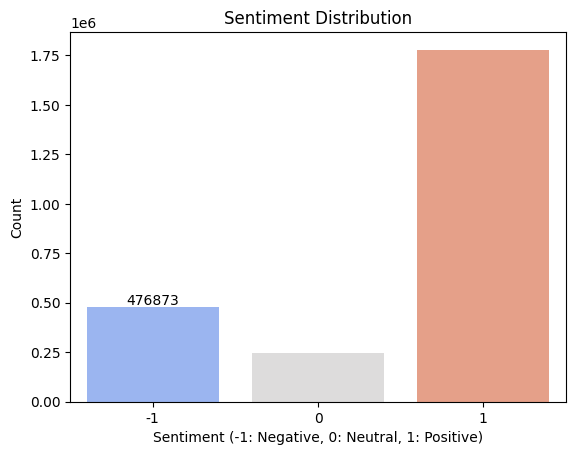

In [33]:

# Convert ratings into sentiment labels
def get_sentiment(rating):
    if rating >= 4.0:
        return 1  # Positive
    elif rating == 3.0:
        return 0  # Neutral
    else:
        return -1  # Negative

df['sentiment'] = df['rating'].apply(get_sentiment)

# Drop the 'rating' column since we now have 'sentiment'
df = df[['text', 'sentiment']]

# Check distribution of sentiment classes
sns.countplot(x=df['sentiment'], palette="coolwarm")

plt.gca().bar_label(plt.gca().containers[0])

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (-1: Negative, 0: Neutral, 1: Positive)")
plt.ylabel("Count")
plt.show()


In [34]:

# Split Temp into Validation (15%) and Test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [35]:
# Print Dataset Sizes
print(f"Training Set: {len(train_df)}")
print(f"Validation Set: {len(val_df)}")
print(f"Test Set: {len(test_df)}")

Training Set: 1750657
Validation Set: 375141
Test Set: 375141
